In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('medical_examination.csv')

# 2
df['overweight'] = df.apply(lambda row: 1 if row['weight'] / ((row['height']/100) ** 2) > 25 else 0, axis=1)

# 3
df['cholesterol'] = df.apply(lambda row: 1 if row['cholesterol'] > 1 else 0, axis=1)
df['gluc'] = df.apply(lambda row: 1 if row['gluc'] > 1 else 0, axis=1)

# 4
def draw_cat_plot():
    # Cria df com 
    df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).value_counts().rename(columns={'count': 'total'})

    # Gera e salva o gráfico
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar').figure
    fig.savefig('catplot.png')
    return fig


def draw_heat_map():
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) & 
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]
    corr = df_heat.corr()
    fig, ax = plt.subplots(figsize=(12, 8))
    mask = np.triu(corr)
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', vmax=0.3, vmin=-0.1, center=0, square=True, linewidths=0.5)
    fig.savefig('heatmap.png')
    return fig


In [80]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


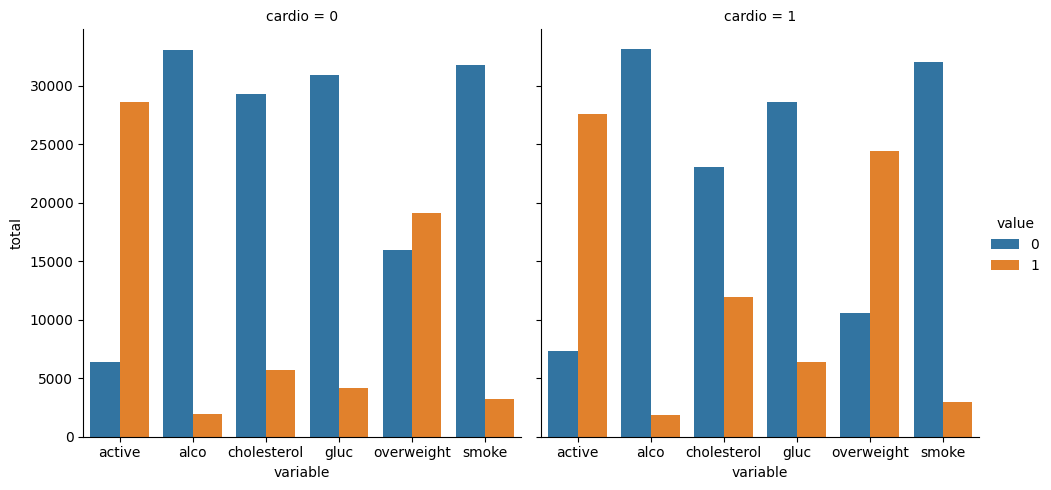

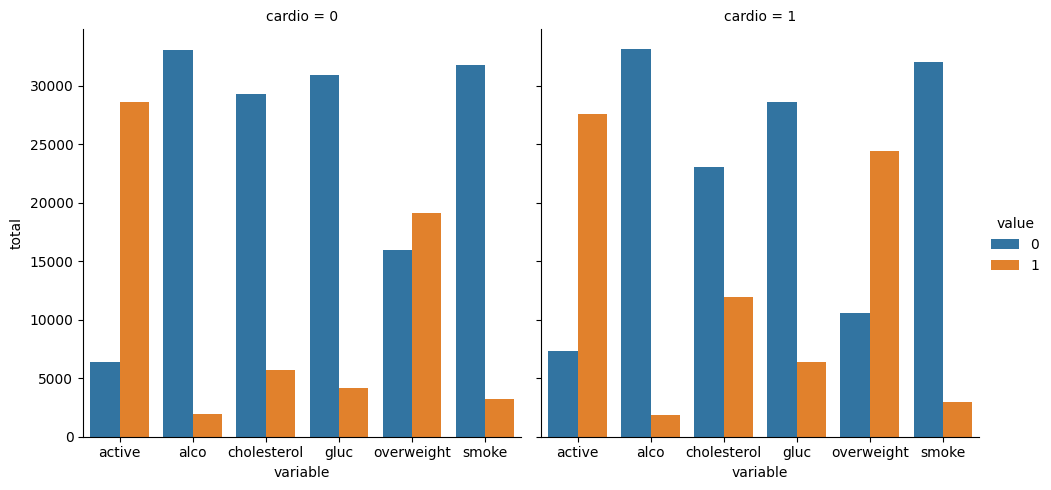

In [79]:
draw_cat_plot()

In [21]:
df = pd.read_csv('medical_examination.csv')
df['overweight'] = df.apply(lambda row: 1 if row['weight'] / ((row['height']/100) ** 2) > 25 else 0, axis=1)
df['cholesterol'] = df.apply(lambda row: 1 if row['cholesterol'] > 1 else 0, axis=1)
df['gluc'] = df.apply(lambda row: 1 if row['gluc'] > 1 else 0, axis=1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [57]:
df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']).groupby(['cardio', 'variable', 'value'], as_index=False).value_counts().rename(columns={'count': 'total'})

df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


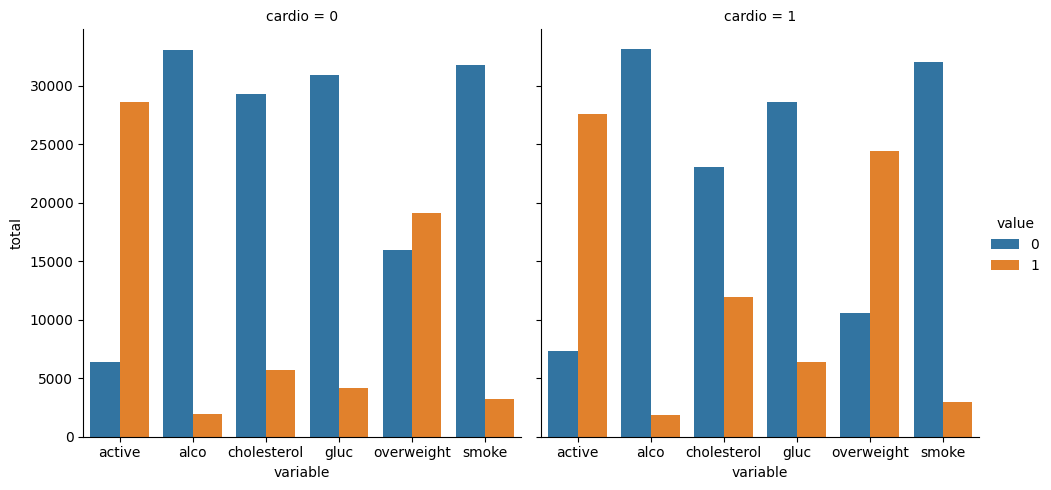

In [112]:
sns.catplot(data=df_cat, x='variable', y='total', col='cardio', kind='bar', hue='value')

<Axes: >

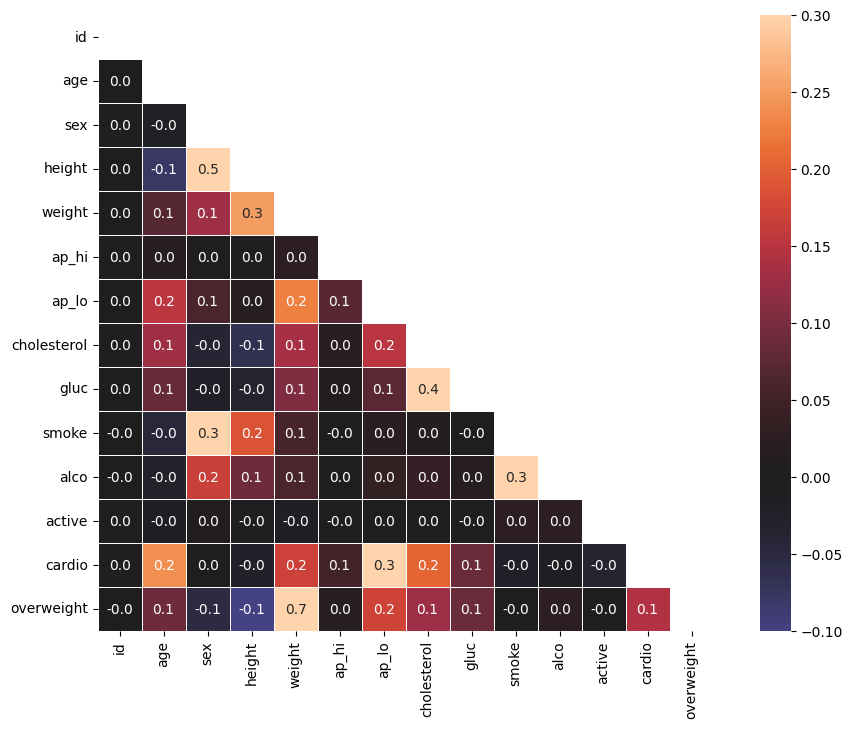

In [110]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) & 
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]
corr = df_heat.corr()

fig, ax = plt.subplots(figsize=(12, 8))
mask = np.triu(corr)

sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', vmax=0.3, vmin=-0.1, center=0, square=True, linewidths=0.5)

In [94]:
corr.min()

id            -0.002732
age           -0.076932
sex           -0.052930
height        -0.149570
weight        -0.014430
ap_hi         -0.001928
ap_lo          0.000484
cholesterol   -0.063522
gluc          -0.030469
smoke         -0.044371
alco          -0.026970
active        -0.037339
cardio        -0.037339
overweight    -0.149570
dtype: float64